# 1. IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import sklearn

In [2]:
print(sklearn.__version__)

1.7.1


In [3]:
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 228MB/s]


In [5]:
!unzip student-performance-factors -d student-performance-factors

Archive:  student-performance-factors.zip
  inflating: student-performance-factors/StudentPerformanceFactors.csv  


# 2. DATA LOADING

In [6]:
df = pd.read_csv("student-performance-factors/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Dari data diatas terlihat 20 Variabel dengan jumlah sebanyak 6607

# 3. DATA UNDERSTANDING


A. Melihat jumlah masing-masing variabel beserta tipenya

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

B. Deskripsi Variabel

Berikut merupakan arti dari masing masing variabel beserta nilai-nilainya.

Variabel | Keterangan | Nilai
------- | ----------- | --------
Hourss_Studied | Jumlah Jam yang dihabiskan siswa untuk belajar | 1-44
Attendance | Tingkat kehadiran siswa | 60-100
Parental_Involvement | Tingkat keterlibatan orang tua dalam pendidikan siswa | Low, Medium, High
Access_to_Resources | Ketersediaan sumber daya pendidikan untuk siswa | Low, Medium, High
Extracurricular_Activities | Partisipasi siswa dalam kegiatan ekstrakurikuler | Yes, No
Sleep_Hours | Jumlah jam tidur siswa setiap malam | 4-10
Previous_Scores | Skor siswa pada tes sebelumnya | 50-100
Motivation_Level | Tingkat motivasi siswa untuk belajar | Low, Medium, High
Internet_Access | Ketersediaan akses internet untuk siswa | Yes, No
Tutoring_Sessions | Jumlah sesi les tambahan yang diikuti siswa | 0-8
Family_Income | Tingkat pendapatan keluarga siswa | Low, Medium, High
Teacher_Quality | Kualitas pengajaran guru | Low, Medium, High
School_Type | Jenis sekolah tempat siswa belajar | Public, Private
Peer_Influence | Pengaruh teman sebaya terhadap siswa |  Negative, Neutral, Positive
Physical_Activity | Frekuensi aktivitas fisik siswa dalam seminggu | 0-6
Learning_Disabilities | Indikasi apakah siswa memiliki kesulitan belajar | No, Yes
Parental_Education_Level |Tingkat pendidikan tertinggi yang dicapai oleh orang tua | High School, College, Postgraduate.
Distance_from_Home | Jarak antara rumah siswa dan sekolah | Near, Moderate, Far
Gender | Jenis kelamin siswa | Male, Female
Exam_Score | Nilai  ujian siswa | 55-101

C. Deskripsi Statistik Data

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 4. DATA CLEANING

A. Menangani Missing Value

In [9]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [10]:
missing_rows = df.loc[(df[["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]].isnull().any(axis=1))]
df = df.loc[(df[["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]].notnull().all(axis=1))]
df.shape

(6378, 20)

B. Memeriksa Outlier

langkah kedua dalam Data Cleaning adalah Memeriksa Outlier pada kolom-kolom Numerik

<Axes: xlabel='Hours_Studied'>

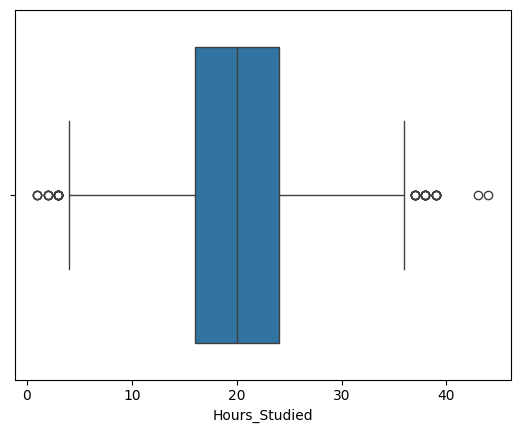

In [11]:
sns.boxplot(x = df["Hours_Studied"])

<Axes: xlabel='Attendance'>

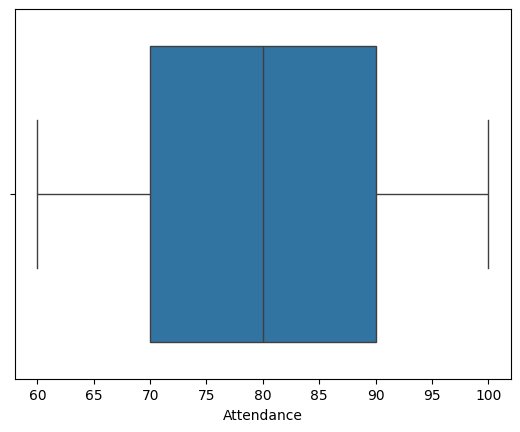

In [12]:
sns.boxplot(x = df["Attendance"])

<Axes: xlabel='Sleep_Hours'>

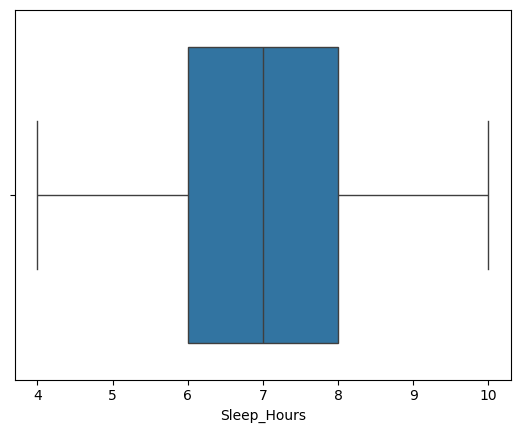

In [13]:
sns.boxplot(x = df["Sleep_Hours"])

<Axes: xlabel='Previous_Scores'>

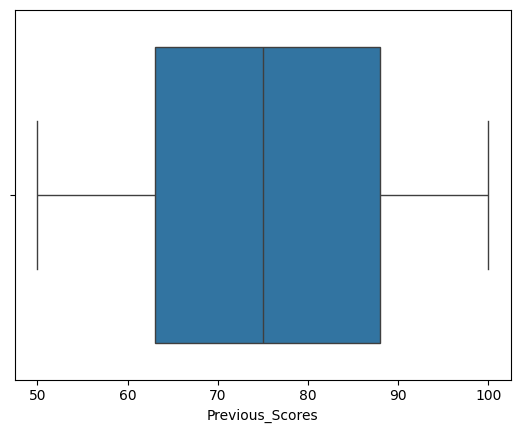

In [14]:
sns.boxplot(x = df["Previous_Scores"])

<Axes: xlabel='Tutoring_Sessions'>

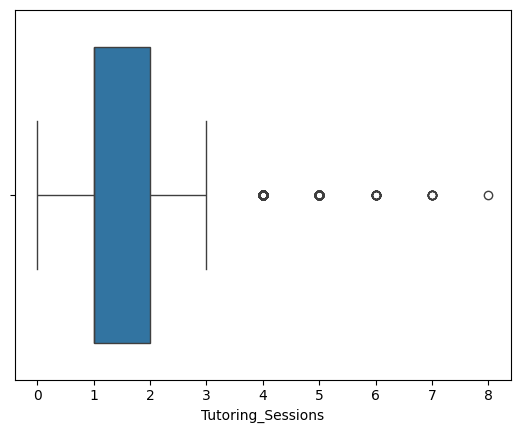

In [15]:
sns.boxplot(x = df["Tutoring_Sessions"])

<Axes: xlabel='Physical_Activity'>

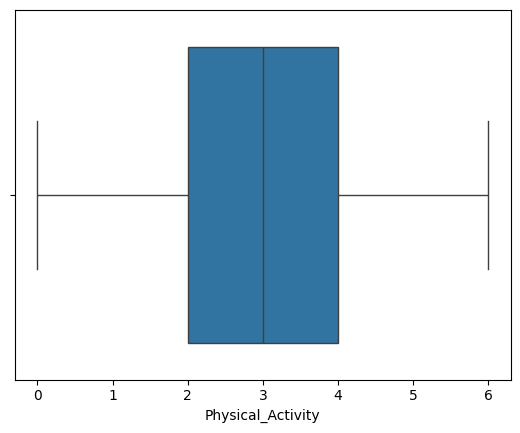

In [16]:
sns.boxplot(x = df["Physical_Activity"])

<Axes: xlabel='Exam_Score'>

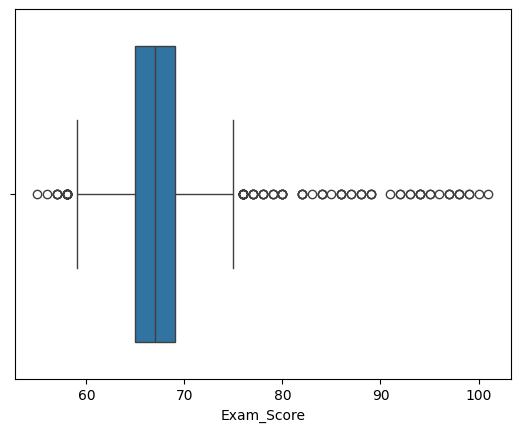

In [17]:
sns.boxplot(x = df["Exam_Score"])

Terlihat bahwa terdapat outlier pada kolom Hours_studied, Tutoring_Sessions, dan Exam_Score. dalam kasus ini, kita akan menghapus outlier menggunakan teknik **Interquartile Range (IQR)**. IQR dihitung sebagai:

IQR=Q3−Q1

dengan:

Batas Bawah:
Q1−1.5*IQR

Batas Atas:
Q3+1.5*IQR

Outlier adalah nilai yang berada di luar batas ini, dan akan dihapus dari dataset.


In [18]:
numeric_columns = df.select_dtypes(include = ["number"]).columns

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |
         (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis =1)]

df.shape

(5836, 20)

C. MEMERIKSA DATA DUPLIKAT

Langkah selanjutnya ialah memeriksa apakah terdapat data duplikat pada dataset ini.

In [19]:
df.duplicated().sum()

np.int64(0)

Berdasarkan hasil diatas, tidak data duplikat dalam dataset ini.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               5836 non-null   int64 
 1   Attendance                  5836 non-null   int64 
 2   Parental_Involvement        5836 non-null   object
 3   Access_to_Resources         5836 non-null   object
 4   Extracurricular_Activities  5836 non-null   object
 5   Sleep_Hours                 5836 non-null   int64 
 6   Previous_Scores             5836 non-null   int64 
 7   Motivation_Level            5836 non-null   object
 8   Internet_Access             5836 non-null   object
 9   Tutoring_Sessions           5836 non-null   int64 
 10  Family_Income               5836 non-null   object
 11  Teacher_Quality             5836 non-null   object
 12  School_Type                 5836 non-null   object
 13  Peer_Influence              5836 non-null   object
 1

Setelah proses data cleaning, jumlah total baris data yang tersisa 5836

# 5. EXPLORATORY DATA ANALYSIS

## A. Univariate Analysis

pada kode dibawah Membagi kolom-kolom menjadi kolom numerikal dan kolom kategorikal

In [21]:
numerical_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]
categorical_features = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

1. Barplot pertama Memeriksa Fitur Parental_Involvement

                      Jumlah Sampel  Persentase
Parental_Involvement                           
Medium                         2992        51.3
High                           1677        28.7
Low                            1167        20.0


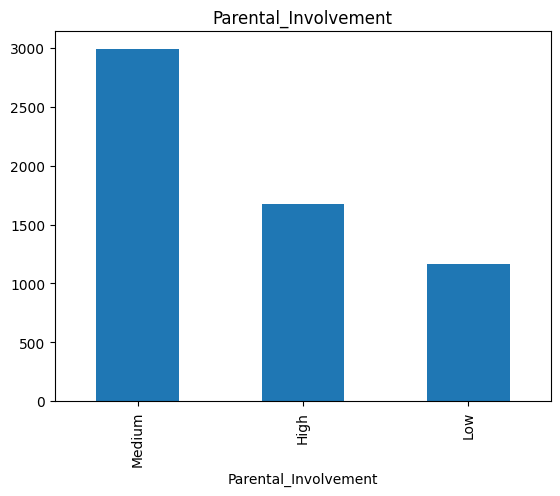

In [22]:
feature = categorical_features[0]
count_parental_involvement = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_parental_involvement = pd.DataFrame({"Jumlah Sampel": count_parental_involvement, "Persentase": percent.round(1)})
print(df_parental_involvement)
count_parental_involvement.plot(kind="bar", title=feature)
plt.xlabel("Parental_Involvement")
plt.show()

Sebagian besar sampel Parental Involvement berada pada tingkat Medium dengan jumlah 2992 yang mewakili 51,3% dari total data.

2. Barplot kedua memerikasa fitur Access_to_Resources

                     Jumlah Sampel  Persentase
Access_to_Resources                           
Medium                        2936        50.3
High                          1737        29.8
Low                           1163        19.9


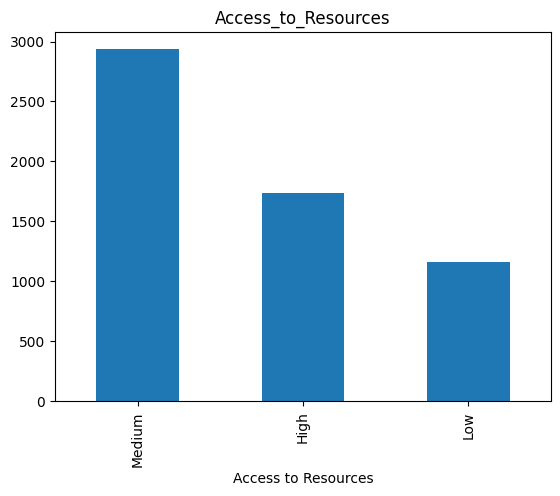

In [23]:
feature = categorical_features[1]
count_Access_to_Resources = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Access_to_Resources = pd.DataFrame({"Jumlah Sampel": count_Access_to_Resources, "Persentase": percent.round(1)})
print(df_Access_to_Resources)
count_Access_to_Resources.plot(kind="bar", title=feature)
plt.xlabel("Access to Resources")
plt.show()

Sebagian besar sampel Access_to_Resources berada pada tingkat Medium dengan jumlah 2963 yang mewakili 50,3% dari total data.

3. Barplot ketiga Memeriksa Fitur Extracurricular Activities

                            Jumlah Sampel  Persentase
Extracurricular_Activities                           
Yes                                  3480        59.6
No                                   2356        40.4


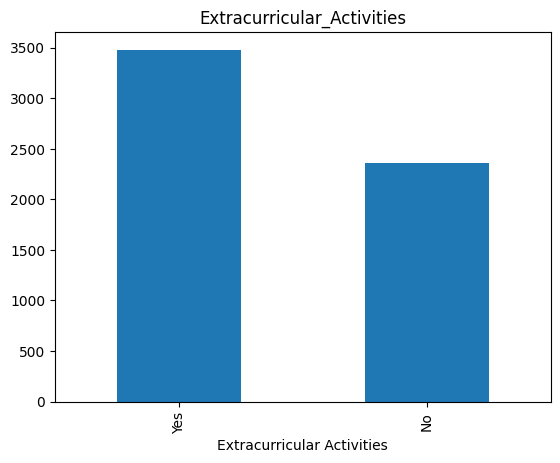

In [24]:
feature = categorical_features[2]
count_Extracurricular_Activities = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Extracurricular_Activities = pd.DataFrame({"Jumlah Sampel": count_Extracurricular_Activities, "Persentase": percent.round(1)})
print(df_Extracurricular_Activities)
count_Extracurricular_Activities.plot(kind="bar", title=feature)
plt.xlabel("Extracurricular Activities")
plt.show()

siswa yang mengikuti kegiatan ekstrakurikuler memiliki jumlah yang lebih banyak dari pada siswa yang tidak mengikuti ekstrakurikuler.

4. Barplot keempat Memeriksa Fitur Motivation Level

                  Jumlah Sampel  Persentase
Motivation_Level                           
Medium                     2967        50.8
Low                        1707        29.2
High                       1162        19.9


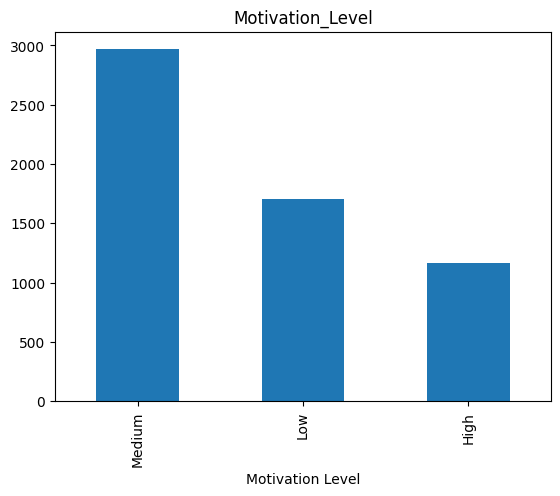

In [25]:
feature = categorical_features[3]
count_Motivation_Level = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Motivation_Level = pd.DataFrame({"Jumlah Sampel": count_Motivation_Level, "Persentase": percent.round(1)})
print(df_Motivation_Level)
count_Motivation_Level.plot(kind="bar", title=feature)
plt.xlabel("Motivation Level")
plt.show()

Sebagian besar sampel Motivation Level berada pada tingkat Medium dengan jumlah 2967 yang mewakili 50,8% dari total data.

5. Barplot kelima Memeriksa Fitur Internet Access

                 Jumlah Sampel  Persentase
Internet_Access                           
Yes                       5387        92.3
No                         449         7.7


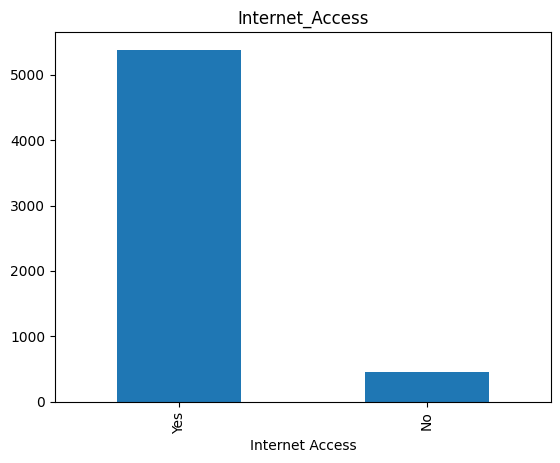

In [26]:
feature = categorical_features[4]
count_Internet_Access = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Internet_Access = pd.DataFrame({"Jumlah Sampel": count_Internet_Access, "Persentase": percent.round(1)})
print(df_Internet_Access)
count_Internet_Access.plot(kind="bar", title=feature)
plt.xlabel("Internet Access")
plt.show()

siswa yang memiliki akses internet memiliki jumlah yang lebih banyak dari pada siswa yang tidak memiliki akses internet.

6. Barplot keenam Memeriksa Fitur Family Income

               Jumlah Sampel  Persentase
Family_Income                           
Medium                  2364        40.5
Low                     2353        40.3
High                    1119        19.2


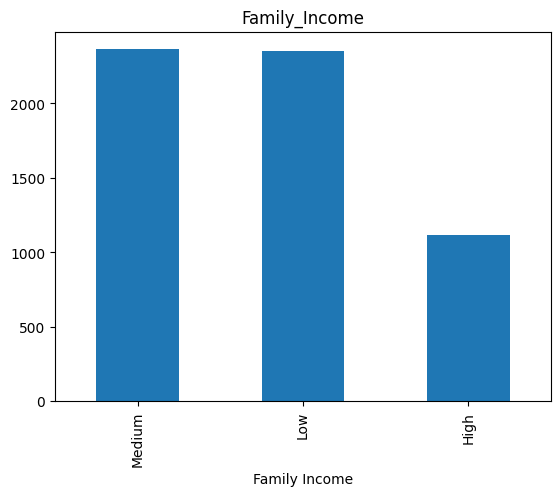

In [27]:
feature = categorical_features[5]
count_Family_Income = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Family_Income = pd.DataFrame({"Jumlah Sampel": count_Family_Income, "Persentase": percent.round(1)})
print(df_Family_Income)
count_Family_Income.plot(kind="bar", title=feature)
plt.xlabel("Family Income")
plt.show()

Sebagian besar sampel Family Income berada pada tingkat Medium dengan jumlah 2364 yang mewakili 40,5% dari total data.

7. Barplot ketujuh Memeriksa Fitur Teacher Quality

                 Jumlah Sampel  Persentase
Teacher_Quality                           
Medium                    3499        60.0
High                      1750        30.0
Low                        587        10.1


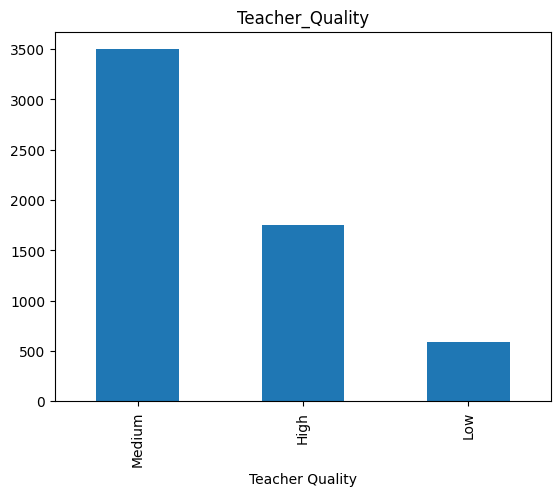

In [28]:
feature = categorical_features[6]
count_Teacher_Quality = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Teacher_Quality = pd.DataFrame({"Jumlah Sampel": count_Teacher_Quality, "Persentase": percent.round(1)})
print(df_Teacher_Quality)
count_Teacher_Quality.plot(kind="bar", title=feature)
plt.xlabel("Teacher Quality")
plt.show()

Sebagian besar sampel Persepsi siswa terhadap kualitas pengajaran guru berada pada tingkat Medium dengan jumlah 3499 yang mewakili 60% dari total data.

8. Barplot kedelapan Memeriksa Fitur School Type

             Jumlah Sampel  Persentase
School_Type                           
Public                4061        69.6
Private               1775        30.4


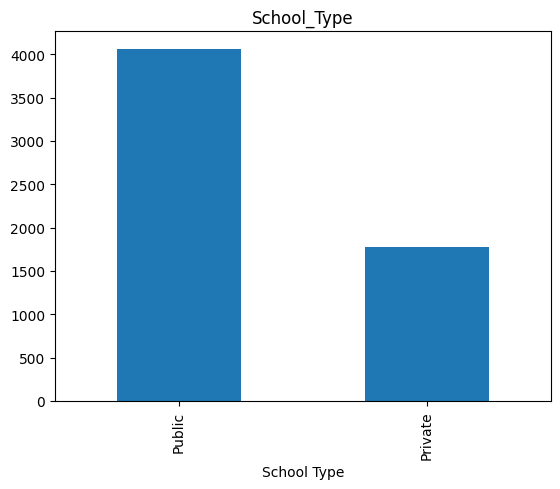

In [29]:
feature = categorical_features[7]
count_School_Type = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_School_Type = pd.DataFrame({"Jumlah Sampel": count_School_Type, "Persentase": percent.round(1)})
print(df_School_Type)
count_School_Type.plot(kind="bar", title=feature)
plt.xlabel("School Type")
plt.show()

School Type dengan kategori Public memiliki jumlah yang lebih banyak dari pada kategori Private.

9. Barplot kesembilan Memeriksa Fitur Peer Influence

                Jumlah Sampel  Persentase
Peer_Influence                           
Positive                 2332        40.0
Neutral                  2288        39.2
Negative                 1216        20.8


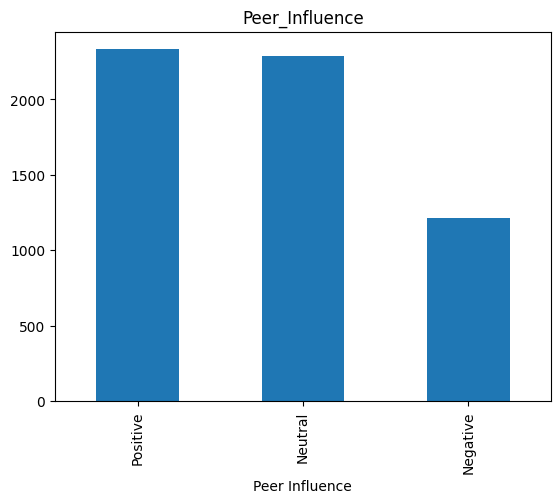

In [30]:
feature = categorical_features[8]
count_Peer_Influence = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Peer_Influence = pd.DataFrame({"Jumlah Sampel": count_Peer_Influence, "Persentase": percent.round(1)})
print(df_Peer_Influence)
count_Peer_Influence.plot(kind="bar", title=feature)
plt.xlabel("Peer Influence")
plt.show()

sebagian besar sampel memiliki pengaruh teman yang positif atau netral, sementara pengaruh negatif relatif lebih kecil.

10. Barplot pertama Memeriksa Fitur Learning Disabilities

                       Jumlah Sampel  Persentase
Learning_Disabilities                           
No                              5241        89.8
Yes                              595        10.2


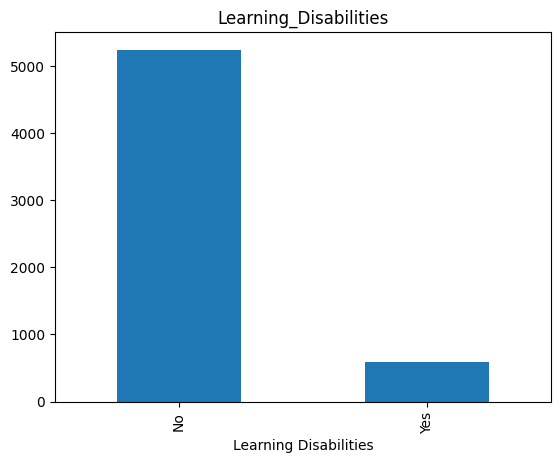

In [31]:
feature = categorical_features[9]
count_Learning_Disabilities = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Learning_Disabilities = pd.DataFrame({"Jumlah Sampel": count_Learning_Disabilities, "Persentase": percent.round(1)})
print(df_Learning_Disabilities)
count_Learning_Disabilities.plot(kind="bar", title=feature)
plt.xlabel("Learning Disabilities")
plt.show()

Sebagian besar sampel tidak memiliki gangguan belajar.

11. Barplot sebelas Memeriksa Fitur Parental Education Level

                          Jumlah Sampel  Persentase
Parental_Education_Level                           
High School                        2892        49.6
College                            1766        30.3
Postgraduate                       1178        20.2


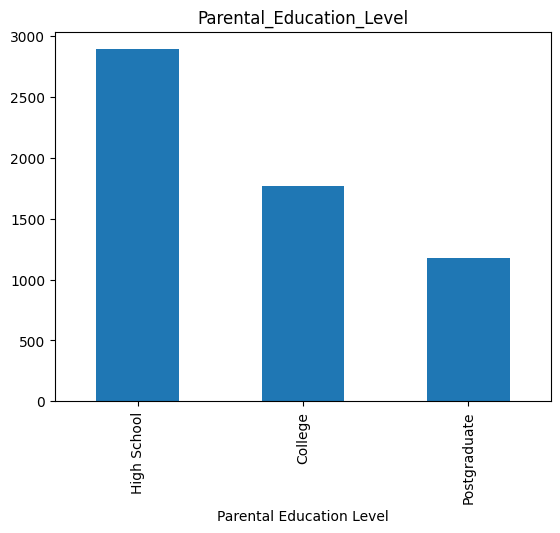

In [32]:
feature = categorical_features[10]
count_Parental_Education_Level = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Parental_Education_Level = pd.DataFrame({"Jumlah Sampel": count_Parental_Education_Level, "Persentase": percent.round(1)})
print(df_Parental_Education_Level)
count_Parental_Education_Level.plot(kind="bar", title=feature)
plt.xlabel("Parental Education Level")
plt.show()

Sebagian besar orang tua memiliki tingkat pendidikan setara High School, sementara tingkat Postgraduate merupakan yang paling sedikit.

12. Barplot duabelas Memeriksa Fitur Distance from Home

                    Jumlah Sampel  Persentase
Distance_from_Home                           
Near                         3479        59.6
Moderate                     1779        30.5
Far                           578         9.9


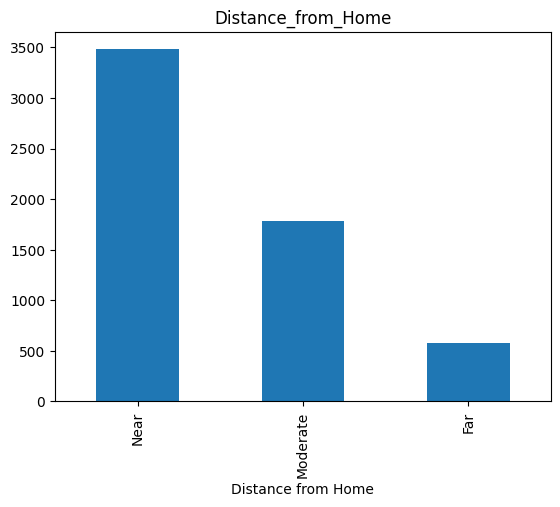

In [33]:
feature = categorical_features[11]
count_Distance_from_Home = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Distance_from_Home = pd.DataFrame({"Jumlah Sampel": count_Distance_from_Home, "Persentase": percent.round(1)})
print(df_Distance_from_Home)
count_Distance_from_Home.plot(kind="bar", title=feature)
plt.xlabel("Distance from Home")
plt.show()

Mayoritas dalam sampel memiliki jarak rumah yang dekat dengan lokasi yang dianalisis, yaitu 59.6% dari total sampel. Sementara itu, sekitar 30.5% memiliki jarak yang sedang, dan hanya 9.9% yang memiliki jarak jauh.

13. Barplot tigabelas Memeriksa Fitur Gender

        Jumlah Sampel  Persentase
Gender                           
Male             3370        57.7
Female           2466        42.3


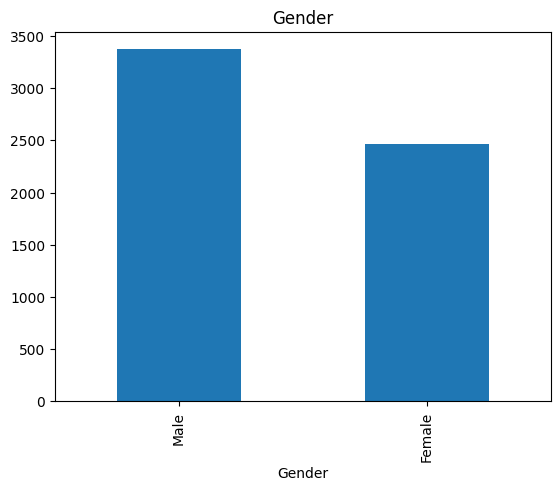

In [34]:
feature = categorical_features[12]
count_Gender = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Gender = pd.DataFrame({"Jumlah Sampel": count_Gender, "Persentase": percent.round(1)})
print(df_Gender)
count_Gender.plot(kind="bar", title=feature)
plt.xlabel("Gender")
plt.show()

jumlah pria lebih banyak dari jumlah perempuan.

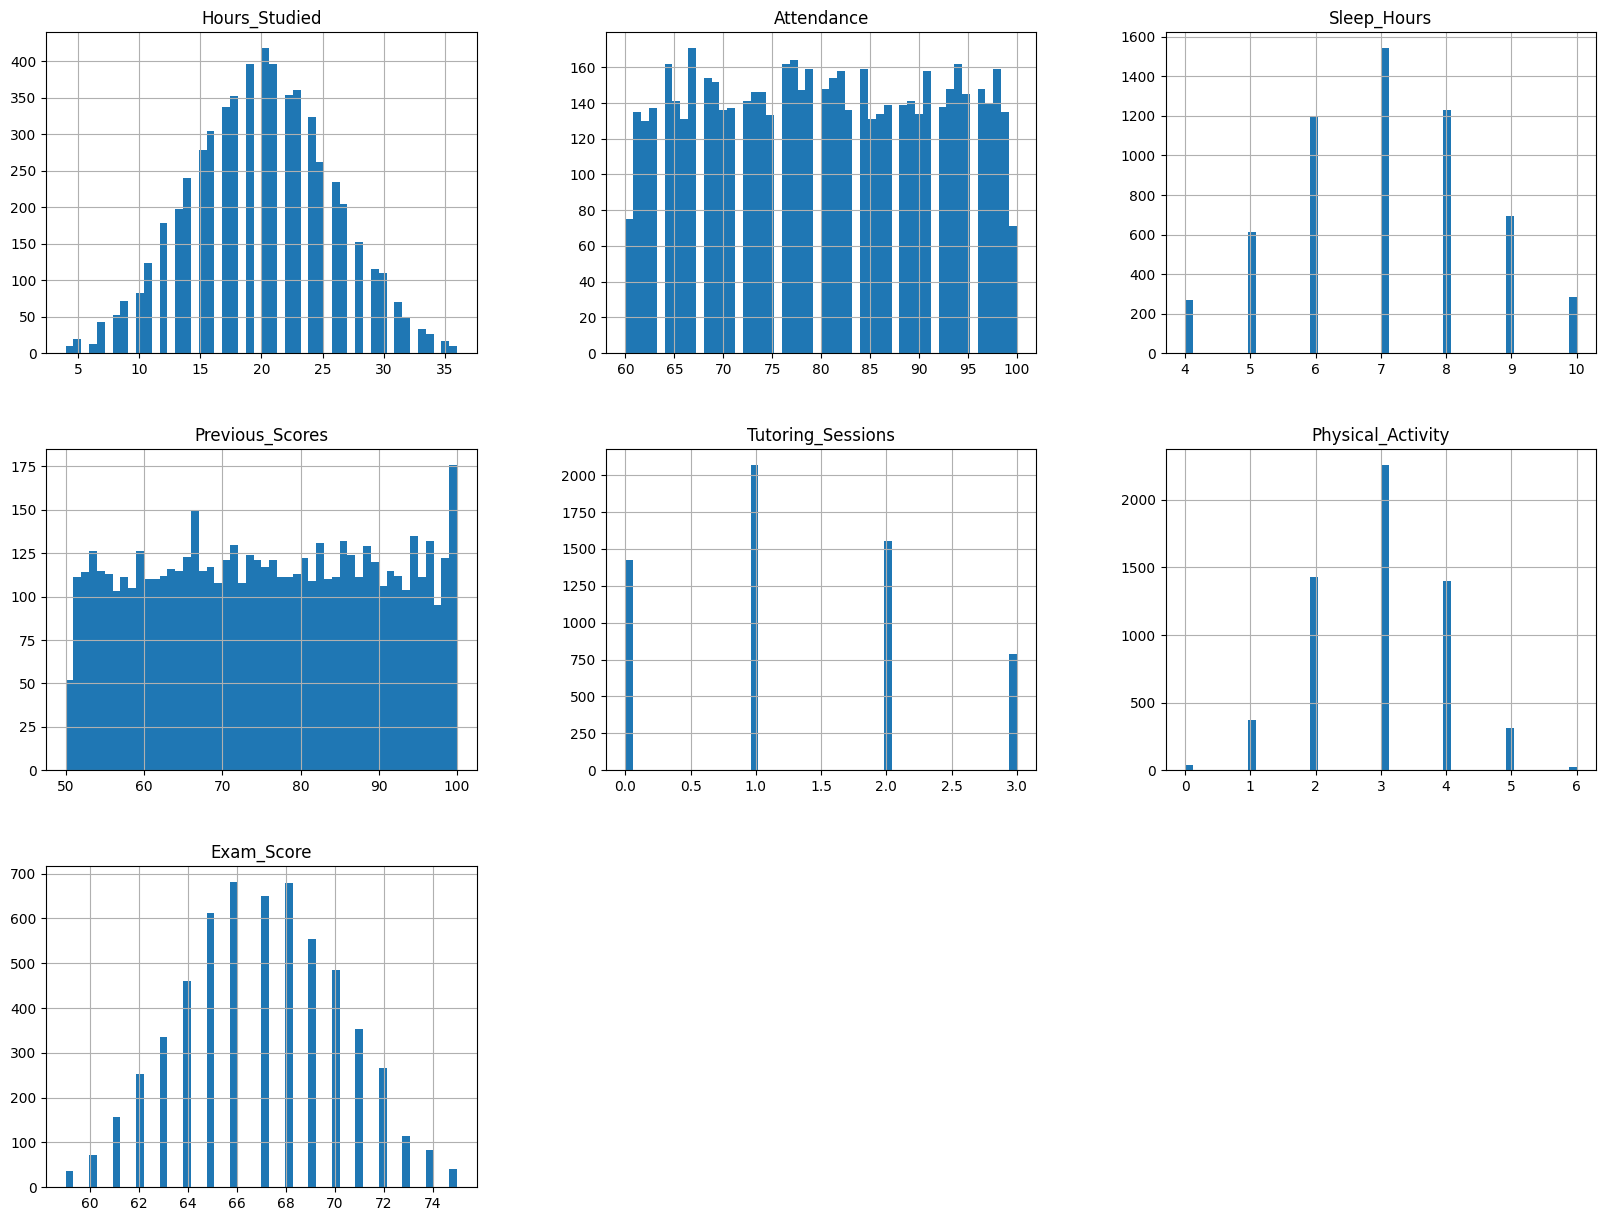

In [35]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

## B. MULTIVARIATE ANALYSIS

In [36]:
mapping = {
    'High School': 1,
    'College': 2,
    'Postgraduate': 3
}

df['Parental_Education_Level'] = df['Parental_Education_Level'].map(mapping)

In [37]:
mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['Parental_Involvement'] = df['Parental_Involvement'].map(mapping)
df['Access_to_Resources'] = df['Access_to_Resources'].map(mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(mapping)
df['Family_Income'] = df['Family_Income'].map(mapping)
df['Teacher_Quality'] = df['Teacher_Quality'].map(mapping)

In [38]:
mapping = {
    'Near': 1,
    'Moderate': 2,
    'Far':3
}

df['Distance_from_Home'] = df['Distance_from_Home'].map(mapping)

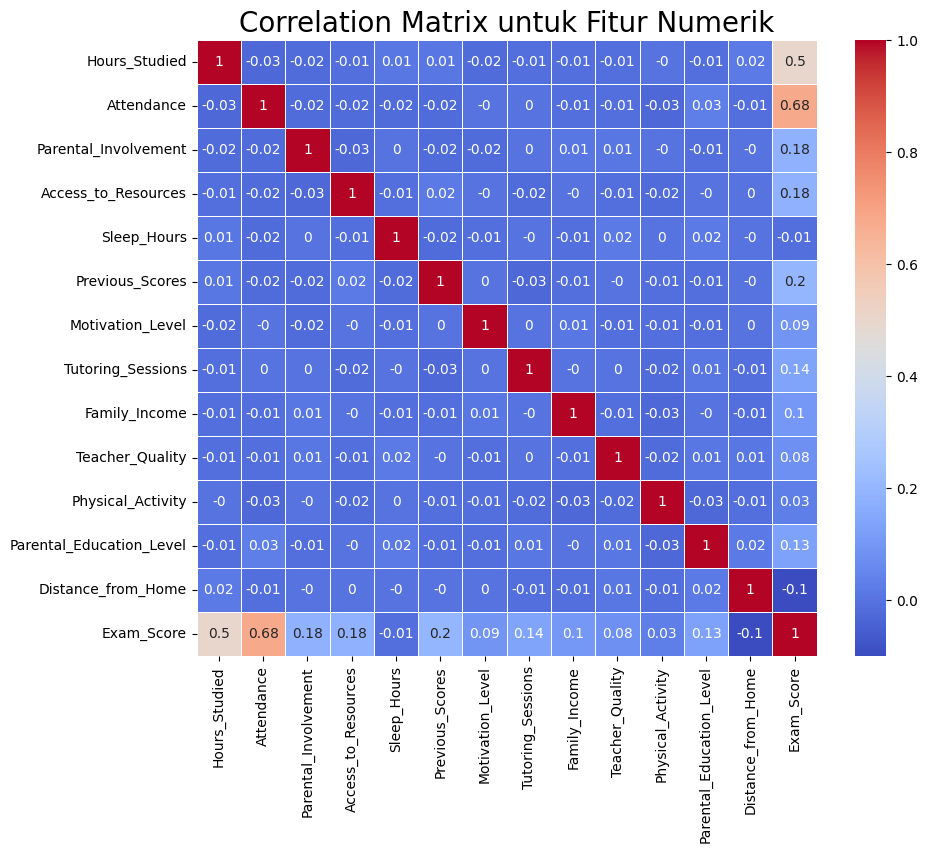

In [39]:
numerik_df = df.select_dtypes(include='number')
correlation_matrix = numerik_df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

# 6. Data Preparation

Menghapus fitur yang memiliki korelasi rendah terhadap variabel target (Exam_Score) berdasarkan analisis korelasi sebelumnya.

In [40]:
df.drop(["Physical_Activity", "Sleep_Hours", "Motivation_Level", "Family_Income", "Teacher_Quality", "Distance_from_Home"], inplace = True, axis = 1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Gender,Exam_Score
0,23,84,1,3,No,73,Yes,0,Public,Positive,No,1,Male,67
1,19,64,1,2,No,59,Yes,2,Public,Negative,No,2,Female,61
2,24,98,2,2,Yes,91,Yes,2,Public,Neutral,No,3,Male,74
3,29,89,1,2,Yes,98,Yes,1,Public,Negative,No,1,Male,71
4,19,92,2,2,Yes,65,Yes,3,Public,Neutral,No,2,Female,70


A. Encoding fitur kategori

In [41]:
df = pd.concat([df, pd.get_dummies(df["Extracurricular_Activities"], prefix = "Extracurricular_Activities")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Internet_Access"], prefix = "Internet_Access")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["School_Type"], prefix = "School_Type")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Peer_Influence"], prefix = "Peer_Influence")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Learning_Disabilities"], prefix = "Learning_Disabilities")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Gender"], prefix = "Gender")],axis = 1)
df.drop(["Extracurricular_Activities", "Gender", "Internet_Access", "School_Type", "Peer_Influence", "Learning_Disabilities", "Gender"], axis = 1, inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Previous_Scores,Tutoring_Sessions,Parental_Education_Level,Exam_Score,Extracurricular_Activities_No,Extracurricular_Activities_Yes,...,Internet_Access_Yes,School_Type_Private,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
0,23,84,1,3,73,0,1,67,True,False,...,True,False,True,False,False,True,True,False,False,True
1,19,64,1,2,59,2,2,61,True,False,...,True,False,True,True,False,False,True,False,True,False
2,24,98,2,2,91,2,3,74,False,True,...,True,False,True,False,True,False,True,False,False,True
3,29,89,1,2,98,1,1,71,False,True,...,True,False,True,True,False,False,True,False,False,True
4,19,92,2,2,65,3,2,70,False,True,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,76,1,1,68,True,False,...,True,False,True,False,False,True,True,False,True,False
6603,23,76,3,2,81,3,1,69,True,False,...,True,False,True,False,False,True,True,False,True,False
6604,20,90,2,1,65,3,3,68,False,True,...,True,False,True,True,False,False,True,False,True,False
6605,10,86,3,3,91,2,1,68,False,True,...,True,True,False,False,False,True,True,False,True,False


B. Reduksi Dimensi dengan PCA

PCA dilakukan untuk menggabungkan dua fitur utama, yaitu Attendance dan Hours_Studied, menjadi satu dimensi baru (dimension). Langkah ini bertujuan untuk mengurangi kompleksitas data dengan tetap mempertahankan informasi penting.

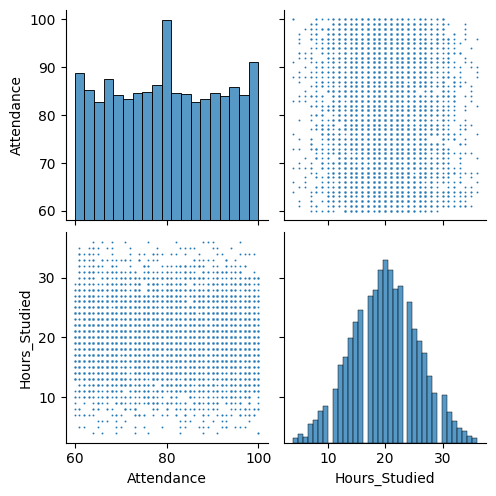

In [42]:
sns.pairplot(df[["Attendance", "Hours_Studied"]], plot_kws = {"s": 2});

Hasilnya, dua fitur ini menunjukkan tidak adanya hubungan linear yang jelas antara Attendance (kehadiran) dan Hours_Studied (jam belajar), dengan sebaran data yang merata. Histogram Attendance memiliki distribusi seragam di kisaran 60-100, sementara Hours_Studied mengikuti distribusi normal dengan puncak di sekitar 20 jam. Kedua fitur ini memiliki pola distribusi yang berbeda, sehingga penting untuk memverifikasi efektivitas PCA jika digunakan untuk mengurangi dimensi data.

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(df[["Attendance", "Hours_Studied"]])
princ_comp = pca.transform(df[["Attendance", "Hours_Studied"]])

In [44]:
pca.explained_variance_ratio_.round(5)

array([0.79839, 0.20161])

Dengan PCA, dua fitur numerik (Attendance dan Hours_Studied) berhasil direduksi menjadi dua komponen utama tanpa kehilangan informasi penting. Komponen pertama menyimpan sebagian besar informasi (79.839%), sehingga sangat representatif, sedangkan komponen kedua melengkapi sisa variansi (20.161%). Teknik ini berguna untuk menyederhanakan analisis data sekaligus mempertahankan pola utama.

In [45]:
pca = PCA(n_components = 1, random_state = 123)
pca.fit(df[["Attendance", "Hours_Studied"]])
df["dimension"] = pca.transform(df.loc[:,  ("Attendance", "Hours_Studied")]).flatten()
df.drop(["Attendance", "Hours_Studied"], axis = 1, inplace = True)

Kode diatas ini menggunakan PCA untuk menggabungkan dua fitur numerik (Attendance dan Hours_Studied) menjadi satu dimensi utama, yaitu kolom dimension. Transformasi ini dilakukan untuk menyederhanakan data sambil mempertahankan informasi inti yang paling signifikan. Kolom asli dihapus untuk mencegah duplikasi data.

C. Train-Test-Split

In [46]:
from sklearn.model_selection import train_test_split
X = df.drop(["Exam_Score"],axis = 1)
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Langkah ini memisahkan dataset menjadi dua bagian:

X: Berisi semua kolom kecuali kolom target Exam_Score. Fitur-fitur ini akan digunakan untuk memprediksi nilai target.
y: Berisi kolom target Exam_Score, yang merupakan variabel yang ingin diprediksi oleh model.

- Data latih (X_train dan y_train): Digunakan untuk melatih model.
- Data uji (X_test dan y_test): Digunakan untuk mengevaluasi performa model.

Parameter test_size=0.2 berarti 20% data akan digunakan sebagai data uji, sementara 80% sisanya akan menjadi data latih.
Parameter random_state=123 digunakan agar pembagian data tetap konsisten setiap kali kode dijalankan.

In [47]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5836
Total # of sample in train dataset: 4668
Total # of sample in test dataset: 1168


D. Standarisasi

StandardScaler dapat dijelaskan dengan rumus berikut:

$$z = \frac{x-u}{s}$$


di mana:

$z$: Nilai data yang sudah distandarisasi
$x$: Nilai data asli sebelum distandarisasi
$u$: Rata-rata dari seluruh data
$s$: Simpangan baku (standar deviasi) dari data

In [48]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Previous_Scores", "dimension"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Previous_Scores,dimension
4111,-1.137376,-1.637140
3843,0.893634,-1.025881
2732,0.823599,-0.436820
6256,-0.577097,1.288116
3145,0.753565,1.209401


In [49]:
X_train[numerical_features].describe().round(4)

,Previous_Scores,dimension
count,4668.0000,4668.0000
mean,0.0000,0.0000
std,1.0001,1.0001
min,-1.7677,-1.7428
25%,-0.8572,-0.8685
50%,-0.0168,-0.0060
75%,0.8936,0.8708
max,1.7341,1.7594


In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

models = pd.DataFrame(index = ["train_mse", "test_mse"],
                      columns = ["KNN", "RandomForest", "Boosting"])

# 7. Modeling

In [51]:
knn = KNeighborsRegressor(n_neighbors=17)
knn.fit(X_train, y_train)
models.loc["train_mse","knn"] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

In [52]:
RF = RandomForestRegressor(n_estimators = 225, max_depth = 30, random_state = 55, n_jobs = -1)
RF.fit(X_train, y_train)
models.loc["train_mse", "RandomForest"] = mean_squared_error(y_pred = RF.predict(X_train), y_true = y_train)

In [53]:
boosting = AdaBoostRegressor(learning_rate = 0.05, random_state = 55)
boosting.fit(X_train, y_train)
models.loc["train_mse", "Boosting"] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

# 8. Evaluasi Model

In [54]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
X_test[numerical_features].head()

/tmp/ipython-input-727048857.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.8572365   0.1232511   1.10373869 ... -0.99730615 -0.78720167
 -0.64713201]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


,Previous_Scores,dimension
4653,-0.857236,1.207815
3488,0.123251,0.443882
5432,1.103739,1.645788
2423,0.263321,1.127515
4756,0.473425,1.575001



Untuk evaluasi model, kita dapat menggunakan Mean Squared Error (MSE), yang dirumuskan sebagai:
$$MSE = \frac{\Sigma (y_i - \hat{y_i})^2}{n}$$
dengan
* $y_i$: Nilai y sesungguhnya
* $\hat{y_i}$: Nilai y prediksi
* $n$: Jumlah data


In [55]:
mse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

model_dict = {"KNN": knn, "RF": RF, "Boosting": boosting}

for name, model in model_dict.items():
    mse.loc[name, "train"] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))
    mse.loc[name, "test"] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))

mse

,train,test
KNN,3.924415,4.264691
RF,0.446462,3.159578
Boosting,4.913071,5.129437


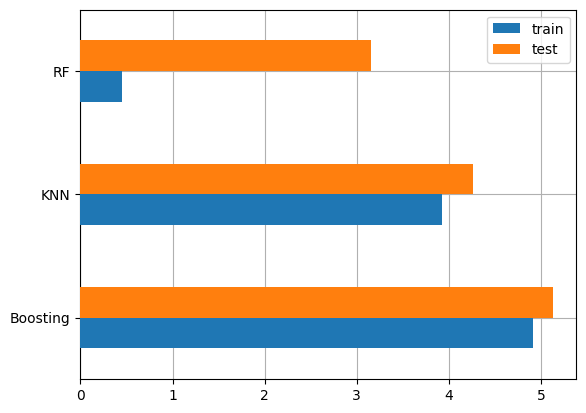

In [56]:
fig, ax = plt.subplots()
mse.sort_values(by = "test", ascending = False).plot(kind = "barh", ax = ax, zorder = 3)
ax.grid(zorder = 0)

In [57]:
prediksi = X_test.iloc[:50].copy()
pred_dict = {'y_true':y_test[:50]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4653,70,68.9,69.1,69.1
3488,69,70.3,69.0,68.6
5432,74,70.8,71.3,70.6
2423,69,68.1,69.1,69.4
4756,71,72.2,71.8,70.5
1934,70,64.4,64.3,64.6
4221,65,65.8,64.6,63.3
229,65,63.7,65.0,64.7
6115,67,67.6,67.1,67.1
825,68,64.9,66.3,65.7


In [58]:
import os
import joblib

joblib.dump(RF, 'model_rf.pkl')
joblib.dump(pca, "pca.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']